In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls

drive  sample_data


In [3]:
DATA_DIR = "drive/MyDrive/rakamin/Final_Project"
!ls $DATA_DIR

application_test.csv	 HomeCredit_columns_description.csv
application_train.csv	 installments_payments.csv
bureau_balance.csv	 POS_CASH_balance.csv
bureau.csv		 previous_application.csv
credit_card_balance.csv  sample_submission.csv


In [4]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
def load_data(path, name):
    df = pd.read_csv(path)
    print(f"{name}: shape is {df.shape}")
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)



application_train: shape is (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [6]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24} =  {datasets[ds_name].shape[0]} \t {datasets[ds_name].shape[1]}')


dataset application_train        =  307511 	 122
dataset application_test         =  48744 	 121
dataset bureau                   =  1716428 	 17
dataset bureau_balance           =  27299925 	 3
dataset credit_card_balance      =  3840312 	 23
dataset installments_payments    =  13605401 	 8
dataset previous_application     =  1670214 	 37
dataset POS_CASH_balance         =  10001358 	 8


#Application Train

##Missing Data

In [7]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(3)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.872,214865
COMMONAREA_AVG,69.872,214865
COMMONAREA_MODE,69.872,214865
NONLIVINGAPARTMENTS_MODE,69.433,213514
NONLIVINGAPARTMENTS_AVG,69.433,213514
NONLIVINGAPARTMENTS_MEDI,69.433,213514
FONDKAPREMONT_MODE,68.386,210295
LIVINGAPARTMENTS_MODE,68.355,210199
LIVINGAPARTMENTS_AVG,68.355,210199
LIVINGAPARTMENTS_MEDI,68.355,210199


##Application Test

In [8]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(3)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_AVG,68.716,33495
COMMONAREA_MODE,68.716,33495
COMMONAREA_MEDI,68.716,33495
NONLIVINGAPARTMENTS_AVG,68.413,33347
NONLIVINGAPARTMENTS_MODE,68.413,33347
NONLIVINGAPARTMENTS_MEDI,68.413,33347
FONDKAPREMONT_MODE,67.284,32797
LIVINGAPARTMENTS_AVG,67.249,32780
LIVINGAPARTMENTS_MODE,67.249,32780
LIVINGAPARTMENTS_MEDI,67.249,32780


##Korelasi Data

###Korelasi Data Kolom Target

In [9]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:')
print(correlations.tail(10))
print("========================================================")
print('Most Negative Correlations:')
print(correlations.head(10))

Most Positive Correlations:
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most Negative Correlations:
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


###Heat Map

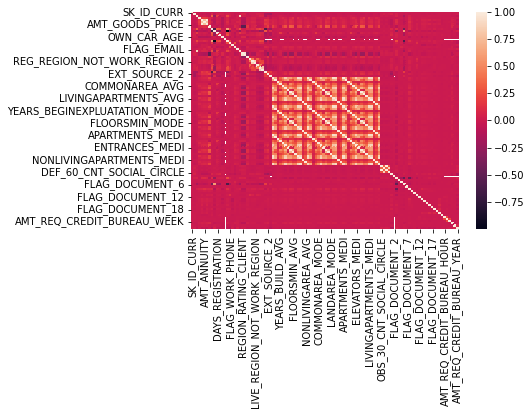

In [10]:
train_data = datasets['application_train']
test_data = datasets['application_test']

dataplot = sns.heatmap(train_data.corr())
plt.show()



##Data Explore

###Umur

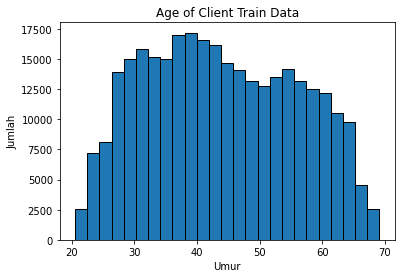

In [11]:
plt.hist(train_data['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client Train Data'); plt.xlabel('Umur'); plt.ylabel('Jumlah');

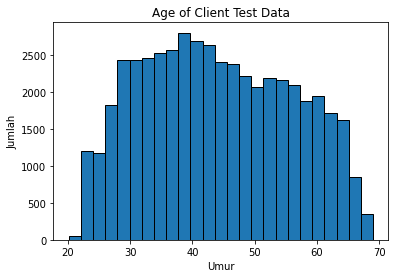

In [12]:
plt.hist(test_data['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client Test Data'); plt.xlabel('Umur'); plt.ylabel('Jumlah');

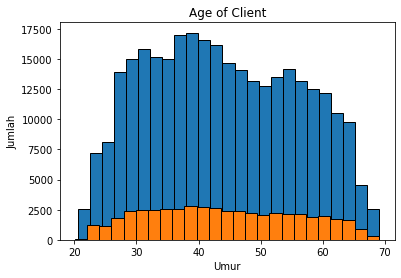

In [13]:
plt.hist(train_data['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Umur'); plt.ylabel('Jumlah');

plt.hist(test_data['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Umur'); plt.ylabel('Jumlah');

###Gender

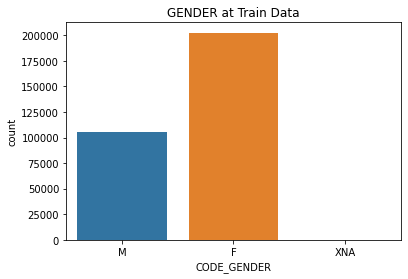

In [14]:
sns.countplot(data=train_data, x='CODE_GENDER')
plt.title('GENDER at Train Data')
plt.show()

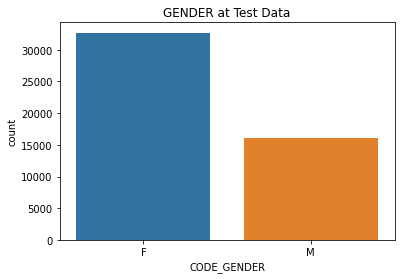

In [15]:
sns.countplot(data=test_data, x='CODE_GENDER')
plt.title('GENDER at Test Data')
plt.show()

###Penghasilan

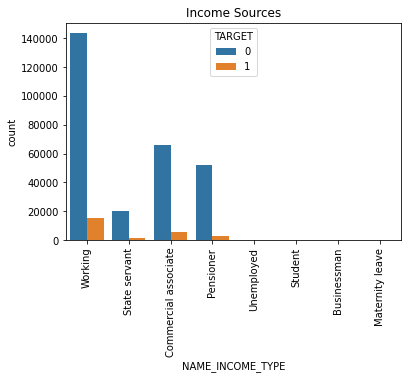

In [16]:
sns.countplot(data=train_data, x='NAME_INCOME_TYPE', hue='TARGET')
plt.title('Income Sources')
plt.xticks(rotation = 90)
plt.show()

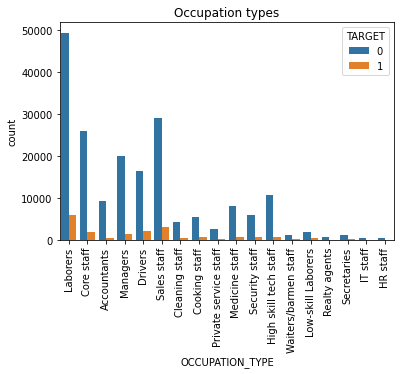

In [17]:
sns.countplot(data=train_data, x='OCCUPATION_TYPE', hue='TARGET')
plt.title('Occupation types')
plt.xticks(rotation = 90)
plt.show()

###AMT Credit

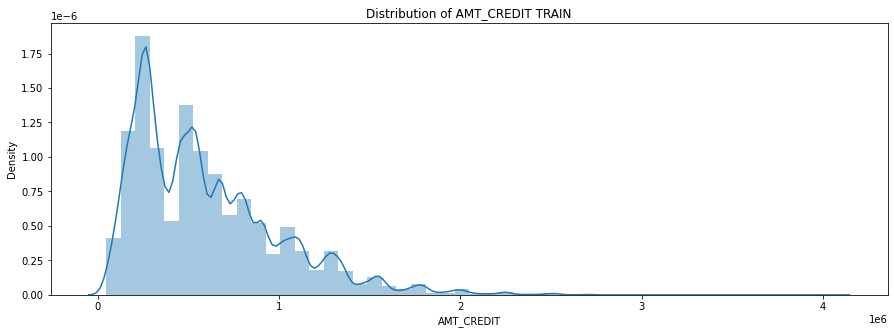

In [18]:
plt.figure(figsize=(15,5))
plt.title("Distribution of AMT_CREDIT TRAIN")
ax = sns.distplot(train_data["AMT_CREDIT"])

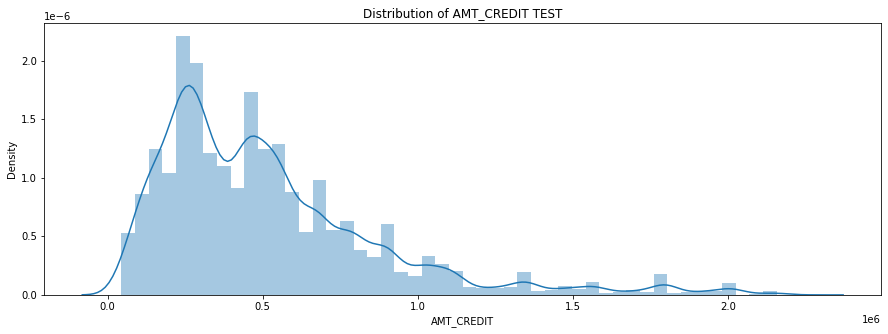

In [19]:
plt.figure(figsize=(15,5))
plt.title("Distribution of AMT_CREDIT TEST")
ax = sns.distplot(test_data["AMT_CREDIT"])

###AMT Annuity

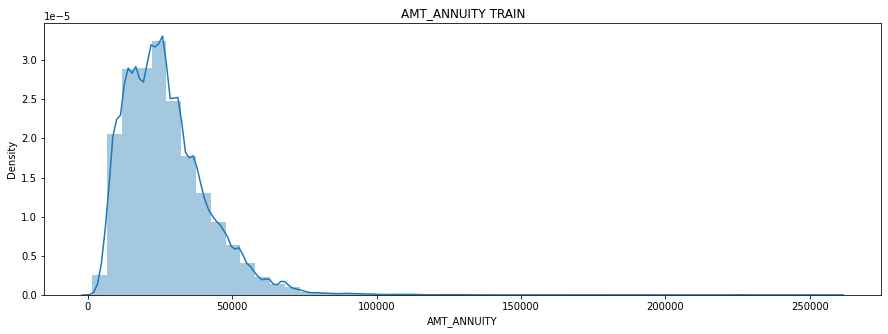

In [20]:
plt.figure(figsize=(15,5))
plt.title("AMT_ANNUITY TRAIN")
ax = sns.distplot(train_data["AMT_ANNUITY"].dropna())

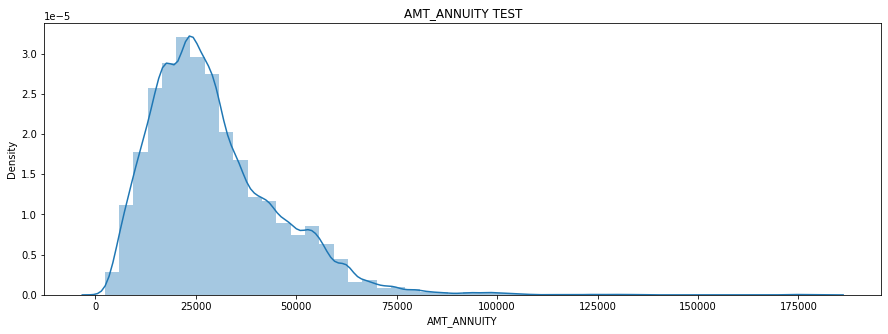

In [21]:
plt.figure(figsize=(15,5))
plt.title("AMT_ANNUITY TEST")
ax = sns.distplot(test_data["AMT_ANNUITY"].dropna())

#Previous Application Data

In [22]:
previous_application_data_frame = datasets['previous_application']
display(previous_application_data_frame.head(5))
display(previous_application_data_frame.describe())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaed656e10>,
      dtype=object)

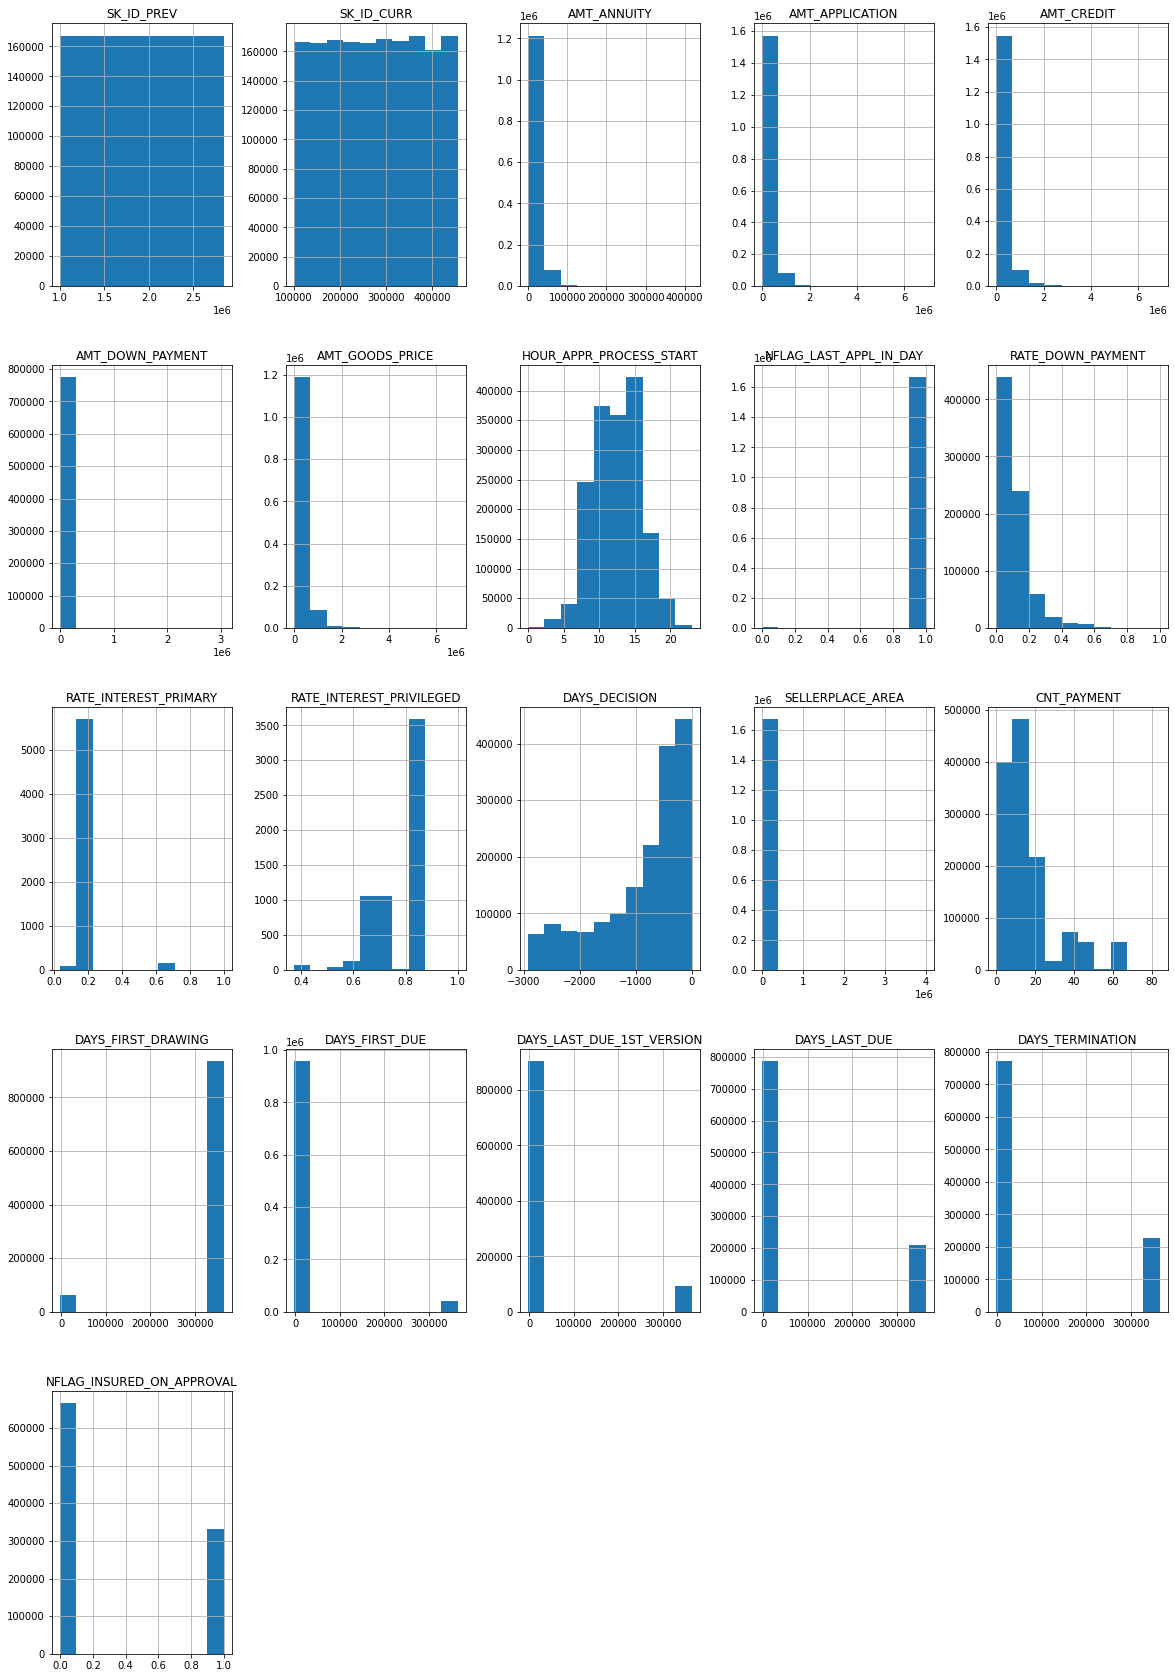

In [23]:
previous_application_data_frame.hist(figsize=(20, 30))

##Missing Data

In [24]:
percentage = (previous_application_data_frame.isnull().sum()/previous_application_data_frame.isnull().count()*100).sort_values(ascending = False).round(2)
missing_total = previous_application_data_frame.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percentage, missing_total], axis=1, keys=['Percent', 'Train Missing Count'])
missing_application_train_data.head(25)

,Percent,Train Missing Count
RATE_INTEREST_PRIVILEGED,99.64,1664263
RATE_INTEREST_PRIMARY,99.64,1664263
AMT_DOWN_PAYMENT,53.64,895844
RATE_DOWN_PAYMENT,53.64,895844
NAME_TYPE_SUITE,49.12,820405
NFLAG_INSURED_ON_APPROVAL,40.30,673065
DAYS_TERMINATION,40.30,673065
DAYS_LAST_DUE,40.30,673065
DAYS_LAST_DUE_1ST_VERSION,40.30,673065
DAYS_FIRST_DUE,40.30,673065


In [25]:
previous_application_data_frame.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1, inplace=True)
correlation_matrix = previous_application_data_frame.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
updated_previous_application_data_frame = previous_application_data_frame.drop(previous_application_data_frame[columns_to_drop], axis=1)
updated_previous_application_data_frame.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,0.0,SATURDAY,15,Y,1,...,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,NaN,THURSDAY,11,Y,1,...,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,NaN,TUESDAY,11,Y,1,...,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,NaN,MONDAY,7,Y,1,...,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,NaN,THURSDAY,9,Y,1,...,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


##Pos Cash Balance

In [26]:
pos_cash_data_frame = datasets['POS_CASH_balance']
display(pos_cash_data_frame.head(10))
display(pos_cash_data_frame.describe())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaece58150>,
      dtype=object)

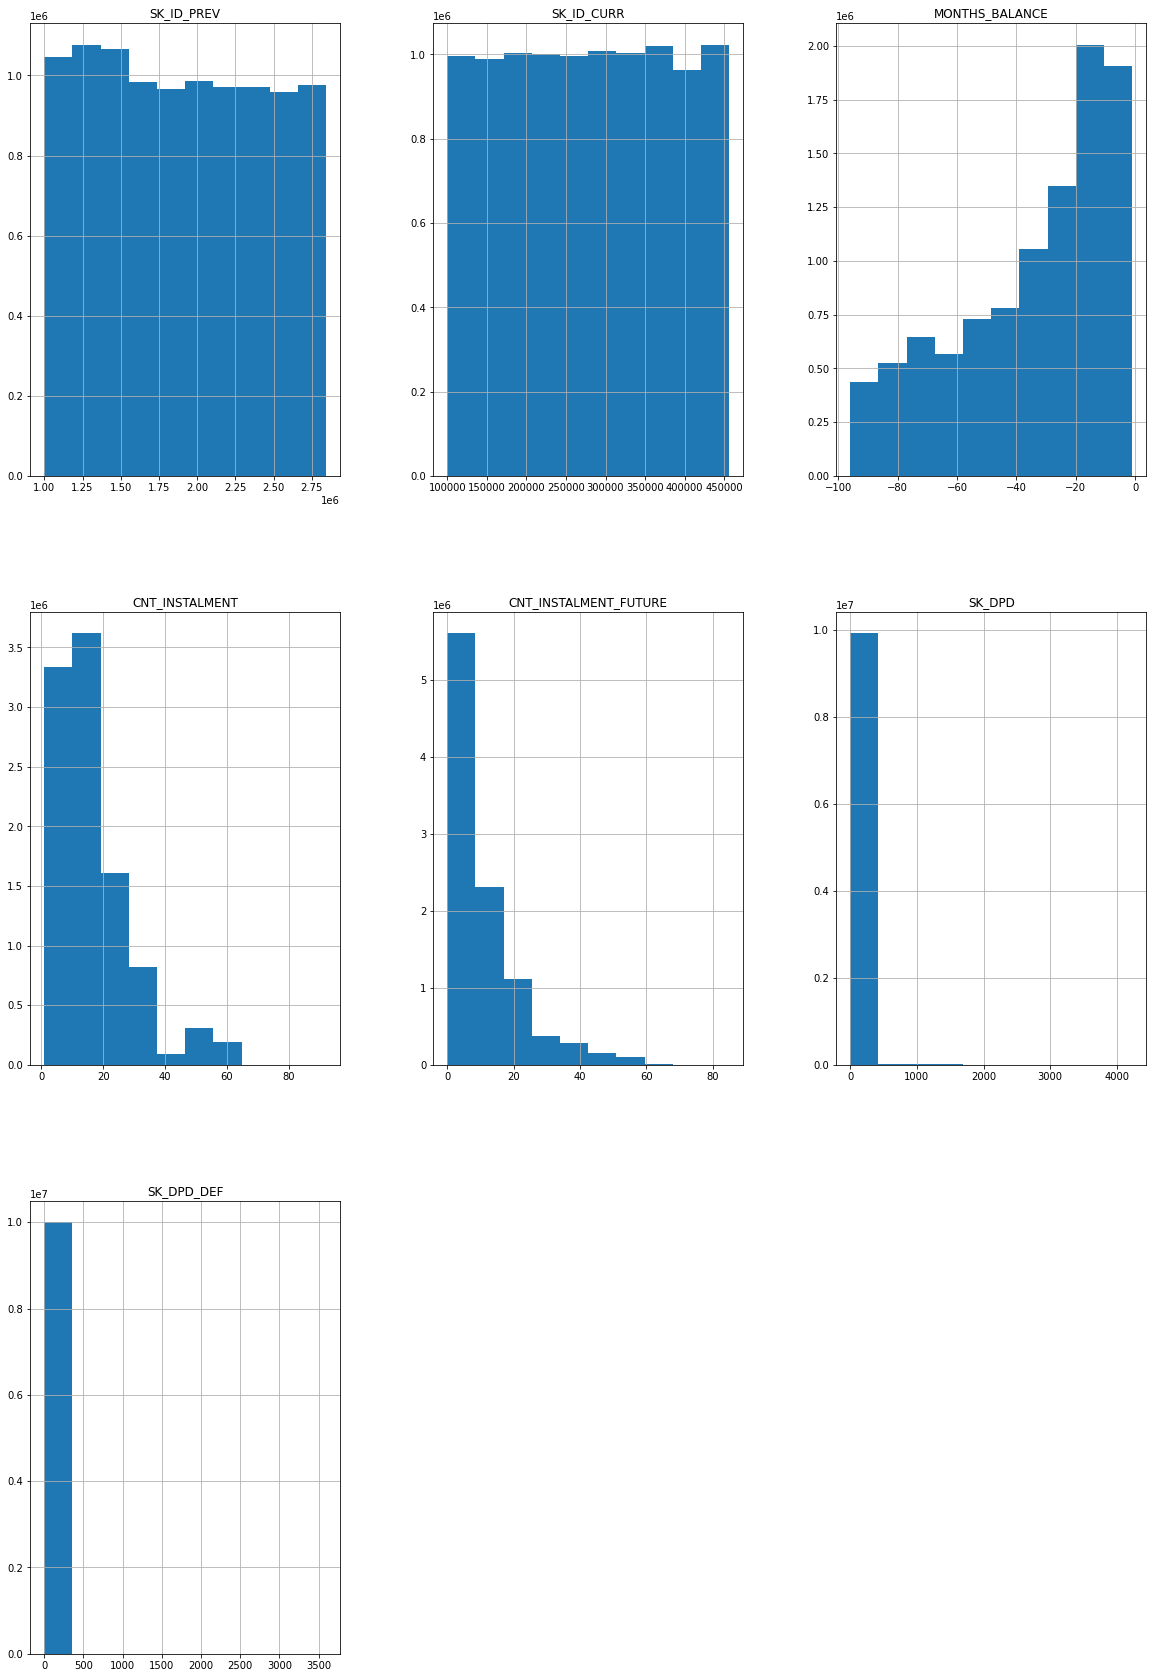

In [27]:
pos_cash_data_frame.hist(figsize=(20, 30))

In [28]:
pos_cash_data_frame_0 = pos_cash_data_frame.loc[pos_cash_data_frame.groupby(['SK_ID_PREV','SK_ID_CURR'])['MONTHS_BALANCE'].idxmax()]   
pos_cash_data_frame_0.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45995,1000001,158271,-8,2.0,0.0,Completed,0,0
2792302,1000002,101962,-50,4.0,0.0,Completed,0,0
7085917,1000003,252457,-1,12.0,9.0,Active,0,0
4078063,1000004,260094,-22,7.0,0.0,Completed,0,0
7852623,1000005,176456,-46,10.0,0.0,Completed,0,0


In [29]:
pos_cash_data_frame_0['NAME_CONTRACT_STATUS'].value_counts()

Completed                698421
Active                   236149
Signed                     1272
Returned to the store       304
Demand                      102
Approved                     58
Amortized debt               17
Canceled                      2
Name: NAME_CONTRACT_STATUS, dtype: int64

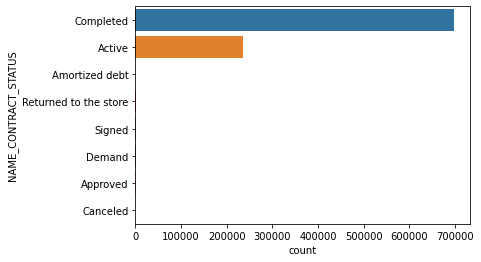

In [30]:
sns.countplot(y='NAME_CONTRACT_STATUS', data=pos_cash_data_frame_0)

#Bureau Data

In [31]:
bureau_data_frame = datasets['bureau']
display(bureau_data_frame.head(10))
display(bureau_data_frame.describe())

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaecea9650>,
      dtype=object)

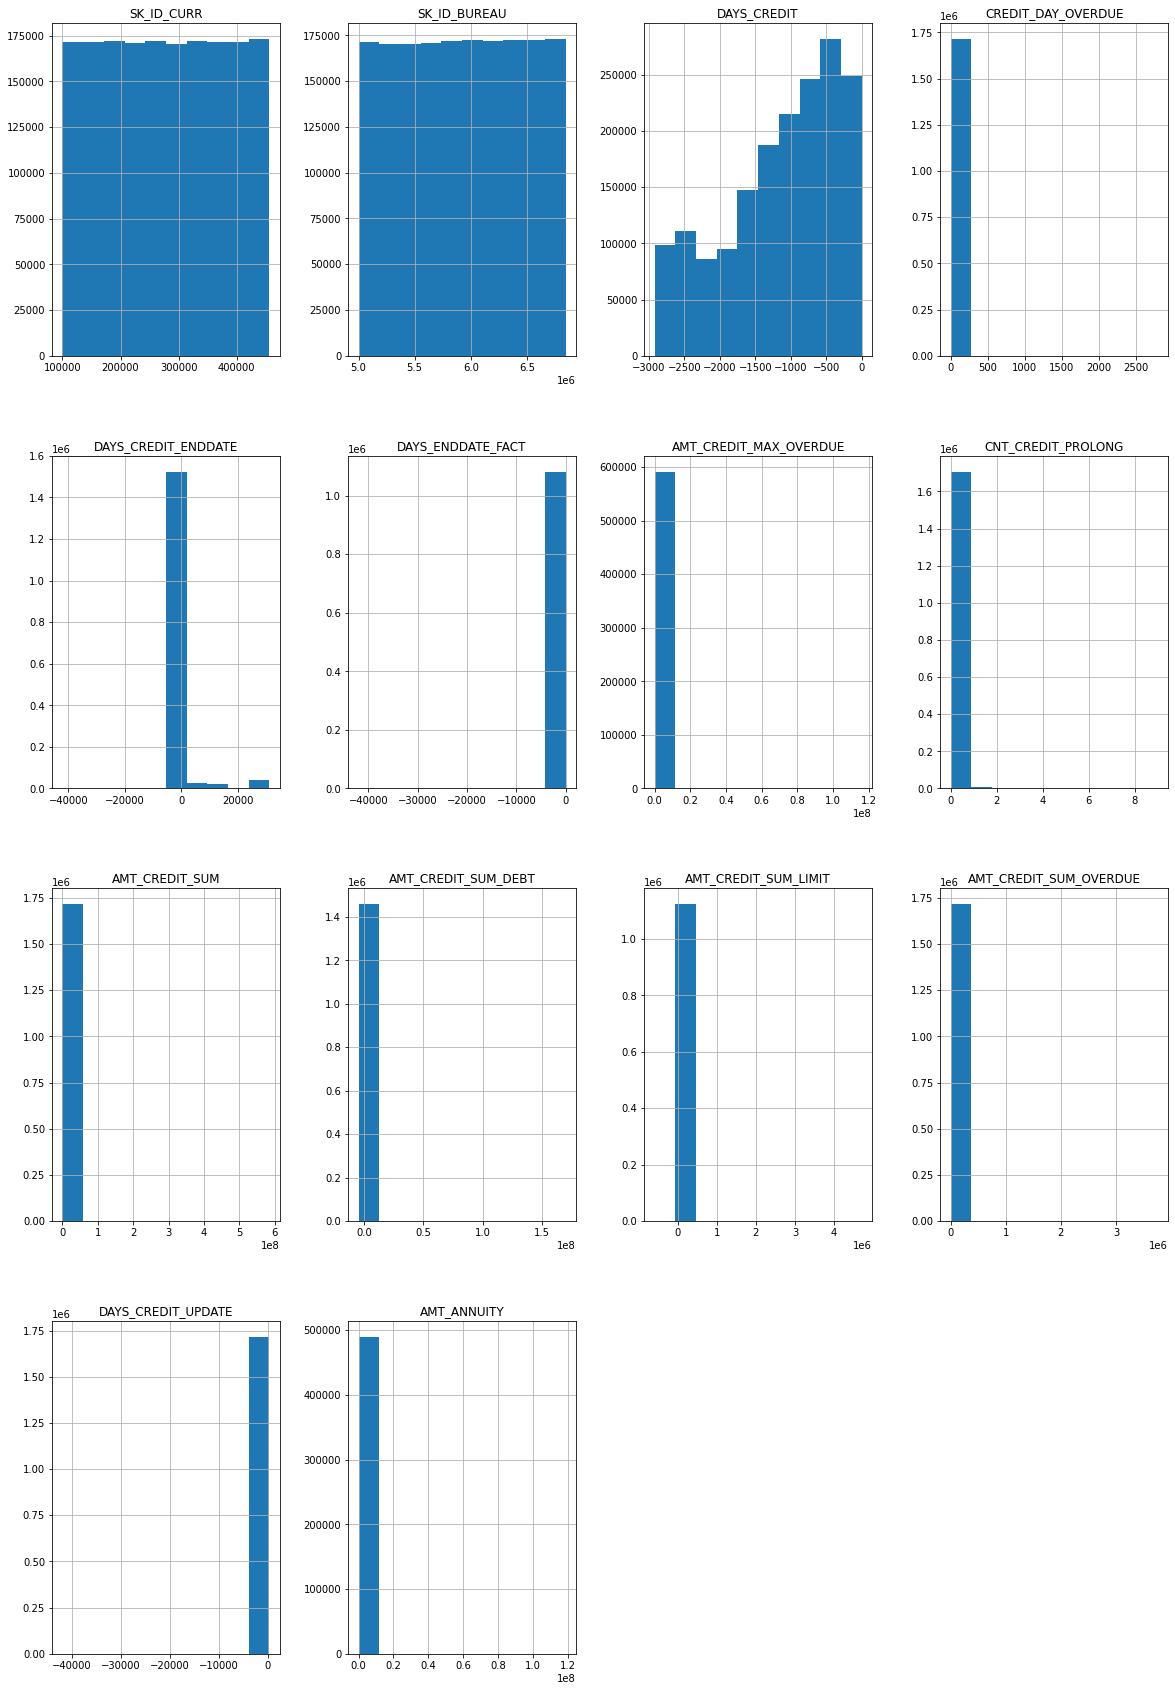

In [32]:
bureau_data_frame.hist(figsize=(20, 30))

#Credit Card Balance

In [33]:
credit_card_data_frame = datasets['credit_card_balance']
display(credit_card_data_frame.head(10))
display(credit_card_data_frame.describe())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae037f110>,
      dtype=object)

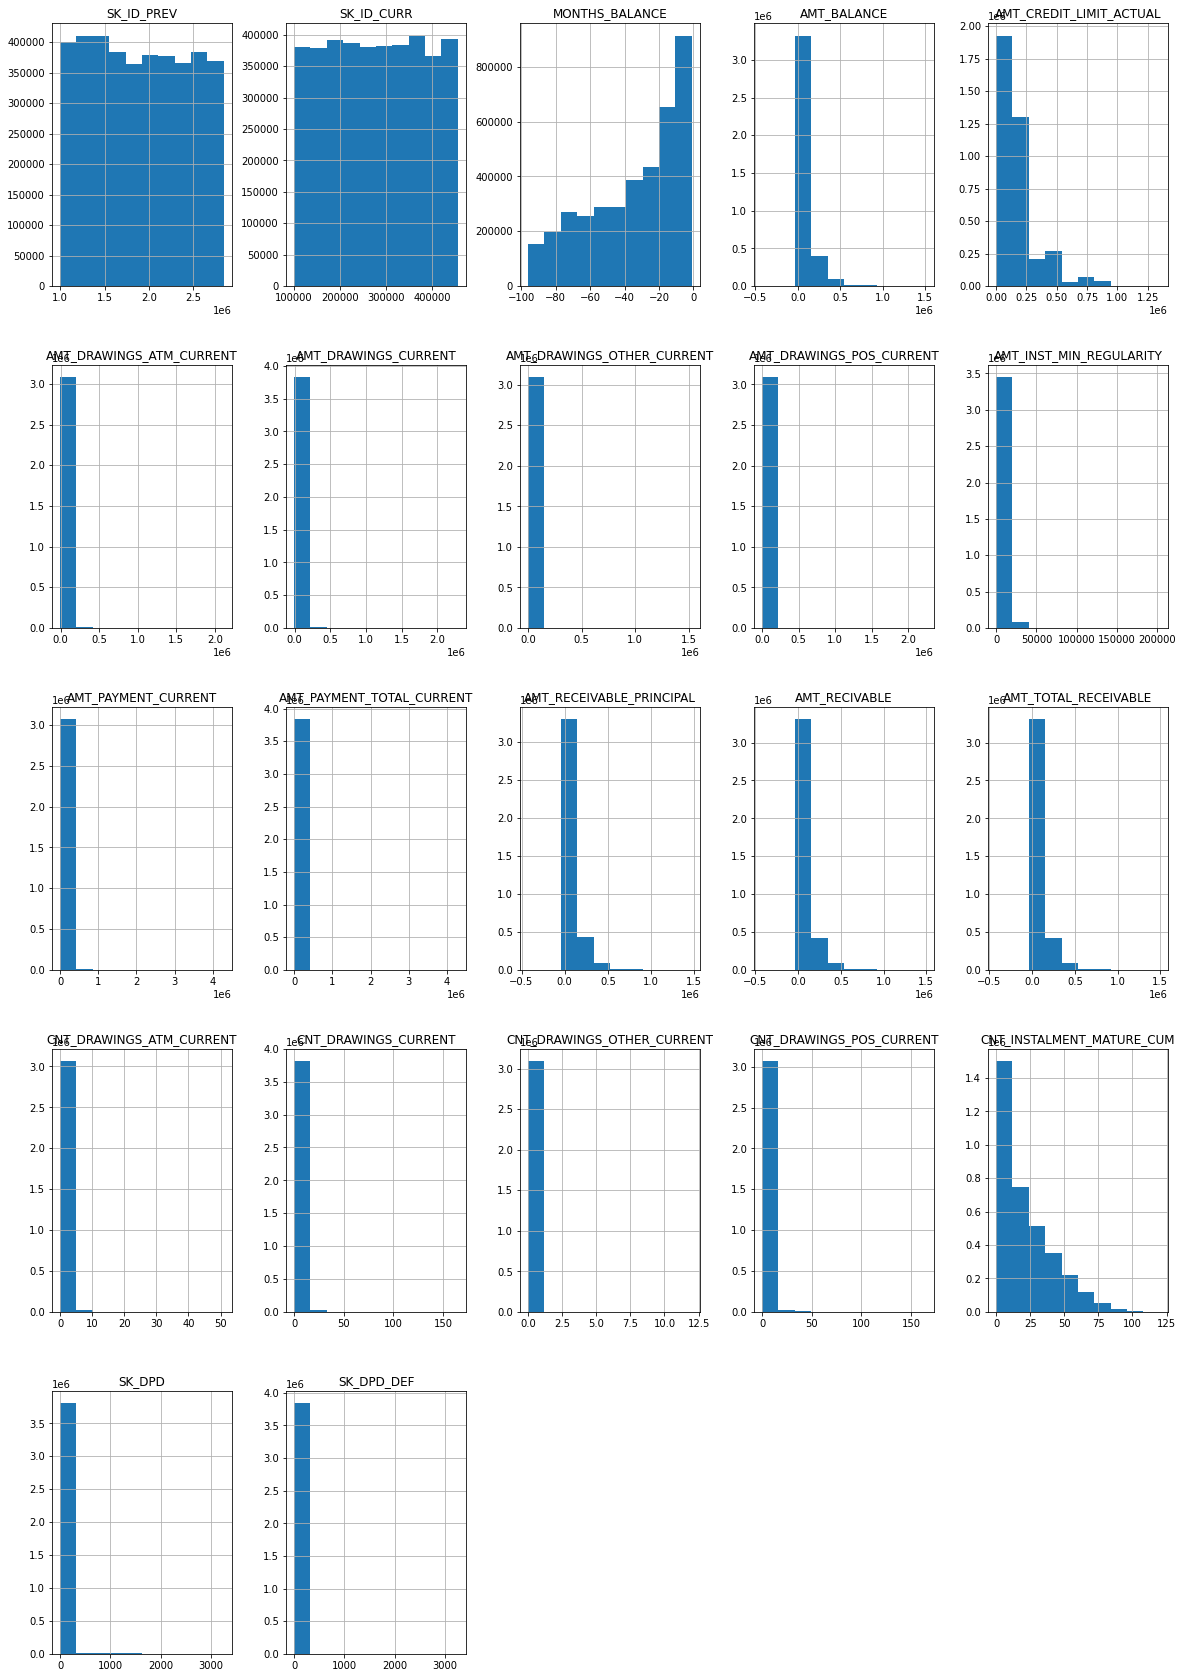

In [34]:
credit_card_data_frame.hist(figsize=(20, 30))

#Installments Payments

In [35]:
installments_data_frame = datasets['installments_payments']
display(credit_card_data_frame.head(10))
display(credit_card_data_frame.describe())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0cf1190>,
      dtype=object)

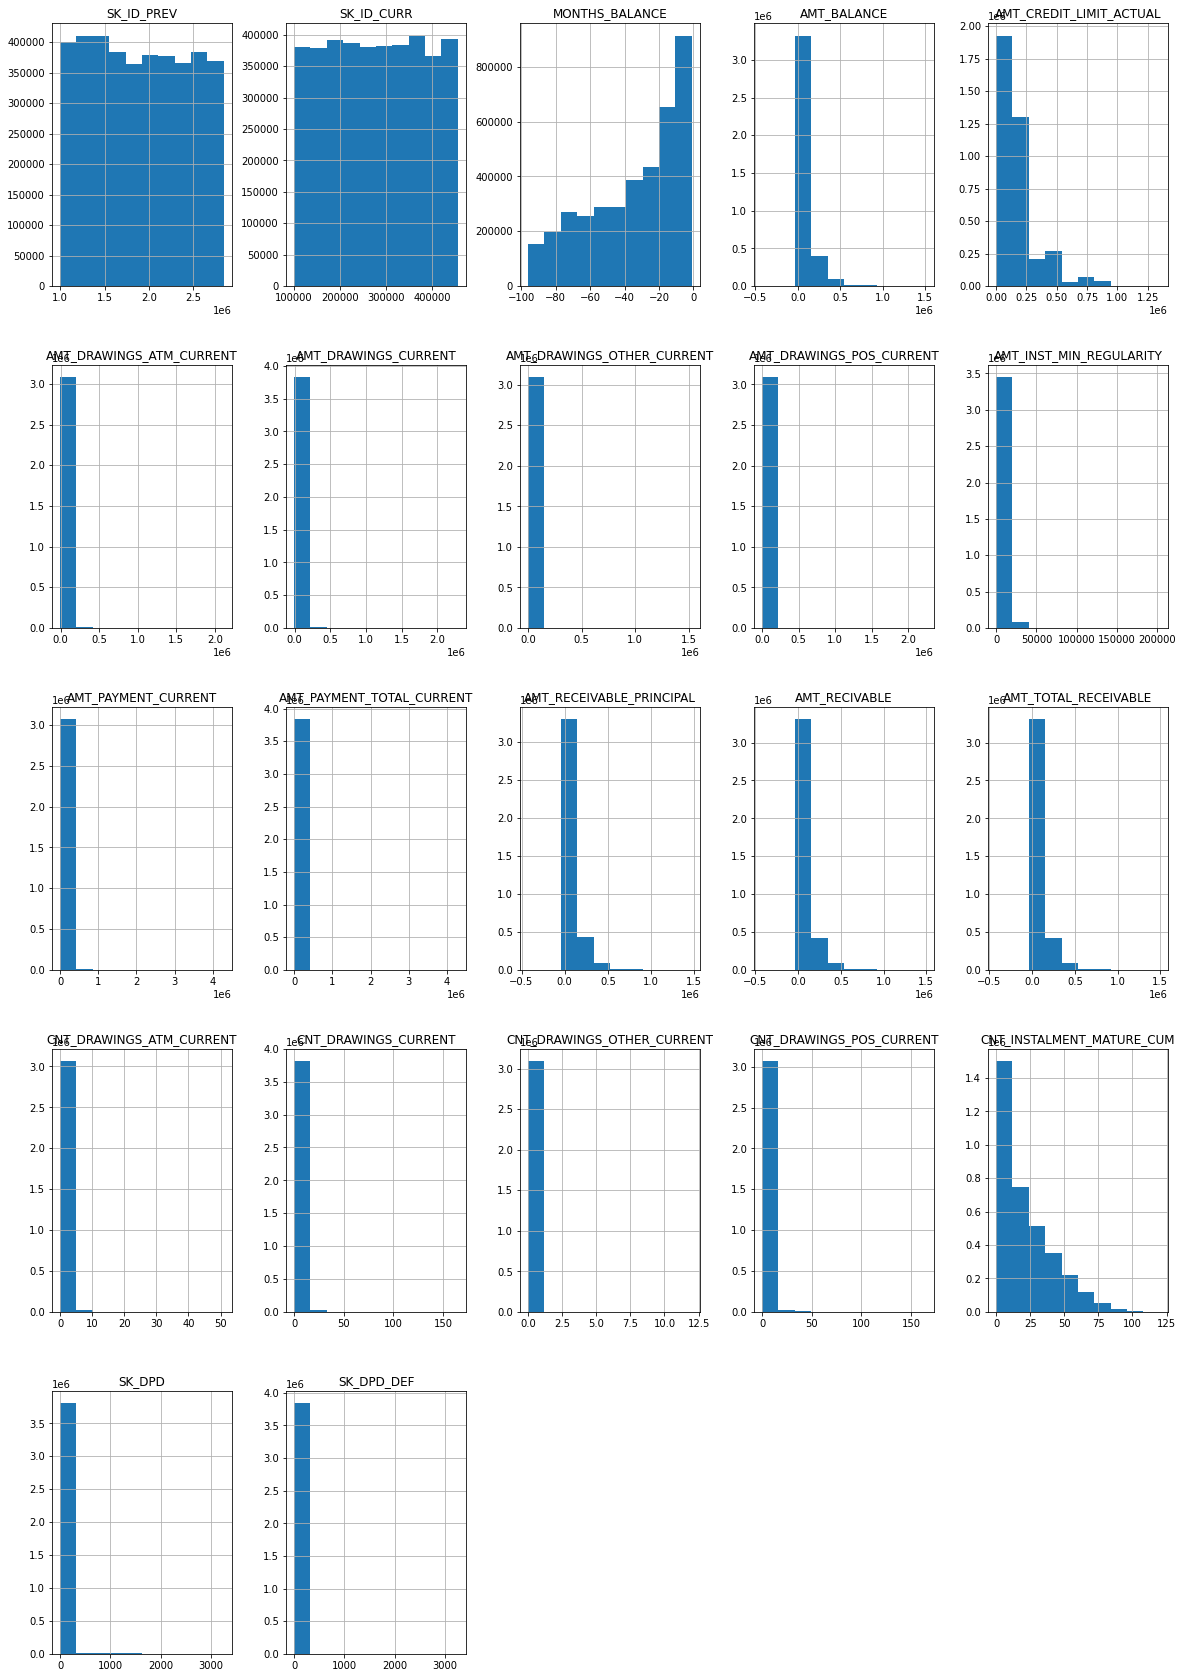

In [36]:
credit_card_data_frame.hist(figsize=(20, 30))

#Engineering

In [37]:
ds_names = ('bureau_final',
            'credit_card_balance_final',
            'installments_payments_final',
            'previous_application_final',
            'POS_CASH_balance_final')

final_data = dict()

In [38]:
train_data['EXCESS_LOAN'] = train_data['AMT_CREDIT'] - train_data['AMT_GOODS_PRICE']
train_data['EXCESS_LOAN'].mask(train_data['EXCESS_LOAN'] < 0, 0, inplace=True)

In [39]:
train_documents = ['SK_ID_CURR']
for c in train_data.columns:
    if c[0:8] == 'FLAG_DOC':
        train_documents.append(c)
        
train_flags = train_data[train_documents]
train_count = train_flags.melt(id_vars = 'SK_ID_CURR', var_name = 'Document', value_name = 'FLAG_DOCS_SUBMITTED').groupby('SK_ID_CURR').sum()
train_count.head()

,FLAG_DOCS_SUBMITTED
SK_ID_CURR,
100002,1
100003,1
100004,0
100006,1
100007,1


In [40]:
train_data_final = pd.merge(train_data, train_count, 'left', 'SK_ID_CURR')
train_data_final['INCOME_PER_FAMILY_MEMBER'] = train_data_final['AMT_INCOME_TOTAL']/train_data_final['CNT_FAM_MEMBERS']
train_data_final['DEBT_TO_INCOME'] = train_data_final['AMT_ANNUITY'] / (train_data_final['AMT_INCOME_TOTAL'] / 12)

In [41]:
train_data_final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXCESS_LOAN,FLAG_DOCS_SUBMITTED,INCOME_PER_FAMILY_MEMBER,DEBT_TO_INCOME
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,55597.5,1,202500.0,1.463733
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,164002.5,1,135000.0,1.586600
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,67500.0,1.200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,15682.5,1,67500.0,2.638800
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,121500.0,2.159556


##Testing Data

In [42]:
test_data['EXCESS_LOAN'] = test_data['AMT_CREDIT'] - test_data['AMT_GOODS_PRICE']
test_data['EXCESS_LOAN'].mask(test_data['EXCESS_LOAN']<0, 0, inplace=True)


test_documents = ['SK_ID_CURR']
for c in test_data.columns:
    if c[0:8] == 'FLAG_DOC':
        test_documents.append(c)
        
test_flags = test_data[test_documents]
test_count = test_flags.melt(id_vars = 'SK_ID_CURR', var_name = 'Document', value_name = "FLAG_DOCS_SUBMITTED").groupby('SK_ID_CURR').sum()
test_data_final = pd.merge(test_data, test_flags, 'left', 'SK_ID_CURR')
test_data_final['INCOME_PER_FAMILY_MEMBER'] = test_data_final['AMT_INCOME_TOTAL']/test_data_final['CNT_FAM_MEMBERS']
test_data_final['DEBT_TO_INCOME'] = test_data_final['AMT_ANNUITY'] / (test_data_final['AMT_INCOME_TOTAL'] / 12)

In [43]:
test_data_final.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_14_y,FLAG_DOCUMENT_15_y,FLAG_DOCUMENT_16_y,FLAG_DOCUMENT_17_y,FLAG_DOCUMENT_18_y,FLAG_DOCUMENT_19_y,FLAG_DOCUMENT_20_y,FLAG_DOCUMENT_21_y,INCOME_PER_FAMILY_MEMBER,DEBT_TO_INCOME
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,0,0,0,67500.0,1.827600
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,0,49500.0,2.105455
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0,0,0,0,101250.0,4.134933
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0,0,0,0,78750.0,1.867371
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,0,60000.0,2.137800


##Preparing Data

In [44]:
pos_cash_status = pos_cash_data_frame_0[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_STATUS']]
pos_cash_status.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS
45995,1000001,158271,Completed
2792302,1000002,101962,Completed
7085917,1000003,252457,Active
4078063,1000004,260094,Completed
7852623,1000005,176456,Completed


In [45]:
dummies = pd.get_dummies(pos_cash_status['NAME_CONTRACT_STATUS'])
dummies.head()

,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
45995,0,0,0,0,1,0,0,0
2792302,0,0,0,0,1,0,0,0
7085917,1,0,0,0,0,0,0,0
4078063,0,0,0,0,1,0,0,0
7852623,0,0,0,0,1,0,0,0


In [46]:
pos_cash_status = pd.concat([pos_cash_status, dummies] , axis=1, sort=False)
pos_cash_status.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
45995,1000001,158271,Completed,0,0,0,0,1,0,0,0
2792302,1000002,101962,Completed,0,0,0,0,1,0,0,0
7085917,1000003,252457,Active,1,0,0,0,0,0,0,0
4078063,1000004,260094,Completed,0,0,0,0,1,0,0,0
7852623,1000005,176456,Completed,0,0,0,0,1,0,0,0


In [47]:
agg_data_frame = pos_cash_data_frame.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg({
    'SK_ID_PREV':['size'],
    'CNT_INSTALMENT_FUTURE':['min'],
    'CNT_INSTALMENT':['max'] 
})

agg_data_frame.columns = agg_data_frame.columns.droplevel()
agg_data_frame.reset_index(inplace=True)
agg_data_frame.columns=['SK_ID_CURR','SK_ID_PREV','Count','Remaining_repays','Initial_term']
display(agg_data_frame.head())

,SK_ID_CURR,SK_ID_PREV,Count,Remaining_repays,Initial_term
0,100001,1369693,5,0.0,4.0
1,100001,1851984,4,0.0,4.0
2,100002,1038818,19,6.0,24.0
3,100003,1810518,8,0.0,12.0
4,100003,2396755,12,1.0,12.0


In [48]:
merged_data_frame = pd.merge(agg_data_frame, pos_cash_status, how='left')
merged_data_frame.head()

,SK_ID_CURR,SK_ID_PREV,Count,Remaining_repays,Initial_term,NAME_CONTRACT_STATUS,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
0,100001,1369693,5,0.0,4.0,Completed,0,0,0,0,1,0,0,0
1,100001,1851984,4,0.0,4.0,Completed,0,0,0,0,1,0,0,0
2,100002,1038818,19,6.0,24.0,Active,1,0,0,0,0,0,0,0
3,100003,1810518,8,0.0,12.0,Completed,0,0,0,0,1,0,0,0
4,100003,2396755,12,1.0,12.0,Active,1,0,0,0,0,0,0,0


In [49]:
merged_agg_data_frame = merged_data_frame.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV':['size'],
    'Remaining_repays':['sum'],
    'Initial_term':  ['min','max'],
    'Active':        ['sum'],
    'Amortized debt':['sum'],
    'Approved':      ['sum'],
    'Canceled':      ['sum'],
    'Completed':     ['sum'],
    'Demand':        ['sum'],
    'Returned to the store':['sum'],
    'Signed':        ['sum']
})

merged_agg_data_frame.columns = merged_agg_data_frame.columns.droplevel()
merged_agg_data_frame.reset_index(inplace=True)
merged_agg_data_frame.columns=['SK_ID_CURR','Count','Total_Remaining_repays','Min_Initial_term','Max_Initial_term','Active','Amortized debt','Approved','Canceled','Completed','Demand','Returned to the store','Signed']
display(merged_agg_data_frame.head())

,SK_ID_CURR,Count,Total_Remaining_repays,Min_Initial_term,Max_Initial_term,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
0,100001,2,0.0,4.0,4.0,0,0,0,0,2,0,0,0
1,100002,1,6.0,24.0,24.0,1,0,0,0,0,0,0,0
2,100003,3,1.0,6.0,12.0,1,0,0,0,2,0,0,0
3,100004,1,0.0,4.0,4.0,0,0,0,0,1,0,0,0
4,100005,1,0.0,12.0,12.0,0,0,0,0,1,0,0,0


In [50]:
final_data['POS_CASH_balance_final'] = merged_agg_data_frame
categorical_features = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS']
updated_prev_app_categorical = updated_previous_application_data_frame[categorical_features]

simple_imputed = SimpleImputer(fill_value='missing', strategy='constant').fit_transform(updated_prev_app_categorical) 

one_hot_encoded = OneHotEncoder().fit(simple_imputed)
categorical_data_frame = pd.DataFrame(one_hot_encoded.transform(simple_imputed).toarray(
            ), index=updated_prev_app_categorical.index, columns=list(one_hot_encoded.get_feature_names(categorical_features)))

categorical_data_frame.columns=['Cashloans', 'Consumerloans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer']
categorical_data_frame.head()

,Cashloans,Consumerloans,Revolvingloans,XNA,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Approved,Canceled,Refused,Unusedoffer
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
updated_previous_application_data_frame = pd.concat([updated_previous_application_data_frame, categorical_data_frame], axis=1)
merged_agg_data_frame = updated_previous_application_data_frame.groupby(by='SK_ID_CURR').agg({
 'Cashloans'     : ['sum'],
 'Consumerloans' : ['sum'],
 'Revolvingloans': ['sum'],
 'XNA'            : ['sum'],
 'FRIDAY'         : ['sum'],
 'MONDAY'         : ['sum'],
 'SATURDAY'       : ['sum'],
 'SUNDAY'         : ['sum'],
 'THURSDAY'       : ['sum'],
 'TUESDAY'        : ['sum'],
 'WEDNESDAY'      : ['sum'],
 'Approved'       : ['sum'],
 'Canceled'       : ['sum'],
 'Refused'        : ['sum'],
 'Unusedoffer'   : ['sum'],
 'SK_ID_PREV'                 : ['size'],
 'AMT_ANNUITY'                : ['min','max','mean'],
 'AMT_APPLICATION'            : ['min','max','mean'],
 'DAYS_DECISION'              : ['min','max','mean'],
})

merged_agg_data_frame.columns = merged_agg_data_frame.columns.droplevel()
merged_agg_data_frame.reset_index(inplace=True)
merged_agg_data_frame.columns= ['SK_ID_CURR','Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean']
display(merged_agg_data_frame.head())

,SK_ID_CURR,Cash loans,Consumer loans,Revolvingloans,XNA,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,...,Total_records,Tot_AMT_ANNUITY_min,Tot_AMT_ANNUITY_max,Tot_AMT_ANNUITY_mean,Tot_AMT_APPLICATION_min,Tot_AMT_APPLICATION_max,Tot_AMT_APPLICATION_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean
0,100001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,-1740,-1740,-1740.0
1,100002,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,-606,-606,-606.0
2,100003,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,-2341,-746,-1305.0
3,100004,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,-815,-815,-815.0
4,100005,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,-757,-315,-536.0


In [52]:
final_data['previous_application_final'] = merged_agg_data_frame
bureau_balance_data_frame = datasets['bureau_balance']
no_of_months = bureau_balance_data_frame.groupby('SK_ID_BUREAU').count()['STATUS']
no_of_late_months = bureau_balance_data_frame[(bureau_balance_data_frame['STATUS'] != '0') & (bureau_balance_data_frame['STATUS'] != 'C') & (bureau_balance_data_frame['STATUS'] != 'X')].groupby('SK_ID_BUREAU').count()['STATUS']

status_data_frame = pd.merge(left = no_of_months, right = no_of_late_months, how = 'left', on = "SK_ID_BUREAU", suffixes = ('_tot', '_late'))
status_data_frame.fillna(0, inplace = True)
status_data_frame.head()

,STATUS_tot,STATUS_late
SK_ID_BUREAU,,
5001709,97,0.0
5001710,83,0.0
5001711,4,0.0
5001712,19,0.0
5001713,22,0.0


In [53]:
bureau_data_frame = datasets['bureau']
bureau_data_frame.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [54]:
credit_debt_data_frame = bureau_data_frame[bureau_data_frame['CREDIT_TYPE'] == 'Credit card']
credit_debt_data_frame.drop(credit_debt_data_frame.columns.difference(['SK_ID_CURR','CREDIT_TYPE', 'AMT_CREDIT_SUM_DEBT']), 1, inplace=True)
credit_debt_data_frame = credit_debt_data_frame.groupby('SK_ID_CURR').sum()
credit_debt_data_frame.rename({'SK_ID_CURR': 'SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT': 'CREDIT_CARD_DEBT'}, axis = 1, inplace = True)
credit_debt_data_frame.head()

,CREDIT_CARD_DEBT
SK_ID_CURR,
100002,0.0
100003,0.0
100005,0.0
100009,326628.0
100011,0.0


In [55]:
active_data_frame = bureau_data_frame[bureau_data_frame['CREDIT_ACTIVE'] == 'Active']
active_data_frame.drop(active_data_frame.columns.difference(['SK_ID_CURR','CREDIT_ACTIVE']), 1, inplace=True)
active_data_frame = active_data_frame.groupby('SK_ID_CURR').count()
active_data_frame.rename({'SK_ID_CURR': 'SK_ID_CURR', 'CREDIT_ACTIVE': 'TOTAL_ACTIVE_LOANS'}, axis = 1, inplace = True)
active_data_frame.head()

,TOTAL_ACTIVE_LOANS
SK_ID_CURR,
100001,3
100002,2
100003,1
100005,2
100008,1


In [56]:
bureau_data_frame.drop(bureau_data_frame.columns.difference(['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'SK_ID_BUREAU']), 1, inplace=True)

merged_bureau_data_frame = pd.merge(bureau_data_frame, status_data_frame, 'left','SK_ID_BUREAU')
merged_bureau_data_frame.drop('SK_ID_BUREAU', inplace = True, axis = 1)
merged_bureau_data_frame = merged_bureau_data_frame.groupby('SK_ID_CURR').sum()

output_bureau = pd.merge(merged_bureau_data_frame, active_data_frame, 'left', 'SK_ID_CURR')
output_bureau = pd.merge(output_bureau, credit_debt_data_frame, 'left', 'SK_ID_CURR')

output_bureau['Percent_Late'] = output_bureau['STATUS_late'] / output_bureau['STATUS_tot']
output_bureau['PERCENT_CREDIT_CARD'] = output_bureau['CREDIT_CARD_DEBT'] / output_bureau['AMT_CREDIT_SUM_DEBT']
output_bureau.drop(['STATUS_tot', 'STATUS_late', 'CREDIT_CARD_DEBT'], axis = 1, inplace = True)

# Adding more details to heading
output_bureau.rename({'AMT_CREDIT_SUM_DEBT': 'TOTAL_DEBT', 'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_DEBT_OVERDUE', 'TOTAL_ACTIVE_LOANS': 'TOTAL_NUMBER_OF_ACTIVE_LOANS', 'Percent_Late': 'PERCENT_LATE'}, axis = 1, inplace = True)
output_bureau['PERCENT_CREDIT_CARD'] = output_bureau['PERCENT_CREDIT_CARD'].fillna(0)
output_bureau['TOTAL_NUMBER_OF_ACTIVE_LOANS'] = output_bureau['TOTAL_NUMBER_OF_ACTIVE_LOANS'].fillna(0)
output_bureau.head()

,TOTAL_DEBT,TOTAL_DEBT_OVERDUE,TOTAL_NUMBER_OF_ACTIVE_LOANS,PERCENT_LATE,PERCENT_CREDIT_CARD
SK_ID_CURR,,,,,
100001,596686.5,0.0,3.0,0.005814,0.0
100002,245781.0,0.0,2.0,0.245455,0.0
100003,0.0,0.0,1.0,NaN,0.0
100004,0.0,0.0,0.0,NaN,0.0
100005,568408.5,0.0,2.0,0.000000,0.0


In [57]:
final_data['bureau_final'] = output_bureau

In [58]:
installments_data_frame['installment_days_difference'] = installments_data_frame['DAYS_ENTRY_PAYMENT'] - installments_data_frame['DAYS_INSTALMENT']
installments_data_frame['installment_amount_difference'] = installments_data_frame['AMT_PAYMENT'] - installments_data_frame['AMT_INSTALMENT']
installments_data_frame.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,installment_days_difference,installment_amount_difference
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,-7.0,0.000
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0,0.000
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0,0.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,-8.0,0.000
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,17.0,-4.455


In [59]:
installments_agg_data_frame = installments_data_frame.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg({
    'installment_days_difference':['mean'],
    'installment_amount_difference':['mean']  
})

installments_agg_data_frame.columns = installments_agg_data_frame.columns.droplevel()
installments_agg_data_frame.reset_index(inplace=True)
installments_agg_data_frame.columns=['SK_ID_CURR','SK_ID_PREV','Avg_installment_days_difference', 'Avg_installment_amount_difference']
display(installments_agg_data_frame.head())

,SK_ID_CURR,SK_ID_PREV,Avg_installment_days_difference,Avg_installment_amount_difference
0,100001,1369693,-15.500000,0.0
1,100001,1851984,3.666667,0.0
2,100002,1038818,-20.421053,0.0
3,100003,1810518,-4.428571,0.0
4,100003,2396755,-6.750000,0.0


In [60]:
installments_output = installments_agg_data_frame.groupby('SK_ID_CURR').agg({
    'Avg_installment_days_difference':['mean'],
    'Avg_installment_amount_difference':['mean']
})

installments_output.columns = installments_output.columns.droplevel()
installments_output.reset_index(inplace=True)
installments_output.columns=['SK_ID_CURR','Avg_installment_days_difference', 'Avg_installment_amount_difference']
display(installments_output.head())

,SK_ID_CURR,Avg_installment_days_difference,Avg_installment_amount_difference
0,100001,-5.916667,0.0
1,100002,-20.421053,0.0
2,100003,-7.448413,0.0
3,100004,-7.666667,0.0
4,100005,-23.555556,0.0


In [61]:
final_data['installments_payments_final'] = installments_output

In [62]:
no_of_months = credit_card_data_frame.groupby('SK_ID_PREV').count()['MONTHS_BALANCE']
no_of_late_months = credit_card_data_frame[(credit_card_data_frame['SK_DPD'] != 0)].groupby('SK_ID_PREV').count()['SK_DPD']
late_credit_data_frame = pd.merge(left = no_of_months, right = no_of_late_months, how = 'left', on = "SK_ID_PREV")
late_credit_data_frame.fillna(0, inplace = True)
late_credit_data_frame.head()

,MONTHS_BALANCE,SK_DPD
SK_ID_PREV,,
1000018,5,0.0
1000030,8,0.0
1000031,16,0.0
1000035,5,0.0
1000077,11,0.0


In [63]:
late_credit_data_frame['Payment_Pass_Due_Perc'] = late_credit_data_frame['SK_DPD'] / late_credit_data_frame['MONTHS_BALANCE']
late_credit_data_frame.head()

,MONTHS_BALANCE,SK_DPD,Payment_Pass_Due_Perc
SK_ID_PREV,,,
1000018,5,0.0,0.0
1000030,8,0.0,0.0
1000031,16,0.0,0.0
1000035,5,0.0,0.0
1000077,11,0.0,0.0


In [64]:
credit_agg_data_frame = credit_card_data_frame.groupby(['SK_ID_CURR','SK_ID_PREV']).agg({
    'AMT_BALANCE':['mean'],
    'AMT_CREDIT_LIMIT_ACTUAL':['mean'],
    'AMT_PAYMENT_TOTAL_CURRENT':['mean'],
})

credit_agg_data_frame.columns = credit_agg_data_frame.columns.droplevel()
credit_agg_data_frame.reset_index(inplace=True)
credit_agg_data_frame.columns=['SK_ID_CURR', 'SK_ID_PREV','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments']
display(credit_agg_data_frame.head())

,SK_ID_CURR,SK_ID_PREV,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments
0,100006,1489396,0.000000,270000.000000,0.000000
1,100011,1843384,54482.111149,164189.189189,4520.067568
2,100013,2038692,18159.919219,131718.750000,6817.172344
3,100021,2594025,0.000000,675000.000000,0.000000
4,100023,1499902,0.000000,135000.000000,0.000000


In [65]:
merged_credit_data_frame = pd.merge(credit_agg_data_frame, late_credit_data_frame, 'left','SK_ID_PREV')
dropped_credit_data_frame = merged_credit_data_frame.drop(columns=['MONTHS_BALANCE', 'SK_DPD'])
dropped_credit_data_frame.head()

,SK_ID_CURR,SK_ID_PREV,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,Payment_Pass_Due_Perc
0,100006,1489396,0.000000,270000.000000,0.000000,0.000000
1,100011,1843384,54482.111149,164189.189189,4520.067568,0.000000
2,100013,2038692,18159.919219,131718.750000,6817.172344,0.010417
3,100021,2594025,0.000000,675000.000000,0.000000,0.000000
4,100023,1499902,0.000000,135000.000000,0.000000,0.000000


In [66]:
credit_card_output = dropped_credit_data_frame.groupby('SK_ID_CURR').agg({
    'CC_Average_Monthly_Balance':['sum'],
    'CC_Average_Credit_Card_Limit':['mean'],
    'CC_Average_Monthly_Payments':['sum'],
    'Payment_Pass_Due_Perc': ['mean']
})

credit_card_output.columns = credit_card_output.columns.droplevel()
credit_card_output.reset_index(inplace=True)
credit_card_output.columns=['SK_ID_CURR','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments', 'CC_Average_percentage_pass_due']
display(credit_card_output.head())

,SK_ID_CURR,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,CC_Average_percentage_pass_due
0,100006,0.000000,270000.000000,0.000000,0.000000
1,100011,54482.111149,164189.189189,4520.067568,0.000000
2,100013,18159.919219,131718.750000,6817.172344,0.010417
3,100021,0.000000,675000.000000,0.000000,0.000000
4,100023,0.000000,135000.000000,0.000000,0.000000


In [67]:
final_data['credit_card_balance_final'] = credit_card_output
for key in final_data.keys():
    print(key, final_data[key].shape)

POS_CASH_balance_final (337252, 13)
previous_application_final (338857, 26)
bureau_final (305811, 5)
installments_payments_final (339587, 3)
credit_card_balance_final (103558, 5)


In [68]:
import pickle 
with open('final_data.pickle', 'wb') as f:
    pickle.dump(final_data, f, protocol=pickle.HIGHEST_PROTOCOL)

with open('final_data.pickle', 'rb') as f:
    final_data = pickle.load(f)

In [81]:
corr_values = train_data.corr()['TARGET'].sort_values()
features_count = 20

In [82]:
selected_features = list(corr_values.tail(features_count // 2 + 1).index) + list(corr_values.head(features_count // 2).index)
selected_features.remove('TARGET')


In [86]:
print(selected_features)

['DAYS_REGISTRATION', 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE']


In [83]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
selected_features += categorical_features
print("Features:", selected_features)

Features: ['DAYS_REGISTRATION', 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE']


In [87]:
from sklearn.model_selection import train_test_split

if False: # Change it to True if want to use only the application data
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test = datasets["application_test"][selected_features]
else:
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15,  random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test = datasets["application_test"][selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"Y train           shape: {y_train.shape}")
print()
print(f"X validation      shape: {X_valid.shape}")
print(f"Y validation      shape: {y_valid.shape}")
print()
print(f"X test            shape: {X_test.shape}")
print(f"Y test            shape: {y_test.shape}")
print()
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 27)
Y train           shape: (222176,)

X validation      shape: (46127, 27)
Y validation      shape: (46127,)

X test            shape: (39208, 27)
Y test            shape: (39208,)

X X_kaggle_test   shape: (48744, 27)


In [89]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [90]:
    numerical_attributes = [ 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 
               'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 
               'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 
               'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE' ]

    categorical_attributes = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']


    numerical_pipeline = Pipeline([('selector', DataFrameSelector(numerical_attributes)),
                            ('imputer', SimpleImputer(strategy='mean')),
                            ('std_scaler', StandardScaler()),])

    categorical_pipeline = Pipeline([('selector', DataFrameSelector(categorical_attributes)),
                            ('imputer', SimpleImputer(strategy='constant')),
                            ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))])

    data_prep_pipeline = FeatureUnion(transformer_list=[("numerical_pipeline", numerical_pipeline),
                                                        ("categorical_pipeline", categorical_pipeline),])

#Logistic Model

In [91]:
from time import time
start_time = time()

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

baseline_model = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

In [92]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, baseline_model.predict(X_train)), 3)

0.92

In [93]:
from sklearn.metrics import roc_auc_score
expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train Time"
                                  ])
exp_name = f"Baseline_Logistic_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, baseline_model.predict(X_train)), 
                accuracy_score(y_valid, baseline_model.predict(X_valid)),
                accuracy_score(y_test, baseline_model.predict(X_test)), 
                roc_auc_score(y_train, baseline_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, baseline_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_27_features,0.9198,0.9192,0.9161,0.739,0.7383,0.7401,8.3976


In [94]:
selected_features = ['SK_ID_CURR','TARGET'] + selected_features
selected_train_data_frame = datasets["application_train"][selected_features]

selected_features.remove('TARGET')
selected_test_data_frame  = datasets["application_test"][selected_features]
selected_features

['SK_ID_CURR',
 'DAYS_REGISTRATION',
 'FLAG_DOCUMENT_3',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_EMPLOYED',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'ELEVATORS_AVG',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE']

In [96]:
def combine_data_frame(data_frame):
    data_frame = pd.merge(data_frame, final_data['POS_CASH_balance_final'][['SK_ID_CURR','Count','Total_Remaining_repays','Max_Initial_term']], 'left', on='SK_ID_CURR')
    data_frame = pd.merge(data_frame, final_data['bureau_final'], 'left', on='SK_ID_CURR')
    data_frame = pd.merge(data_frame, final_data['installments_payments_final'], 'left', on='SK_ID_CURR')
    data_frame = pd.merge(data_frame, final_data['previous_application_final'], 'left', on='SK_ID_CURR')
    data_frame = pd.merge(data_frame, final_data['credit_card_balance_final'], 'left', on='SK_ID_CURR')
    return data_frame

In [97]:
selected_train_data_frame = combine_data_frame(selected_train_data_frame)
selected_test_data_frame = combine_data_frame(selected_test_data_frame)

selected_features.remove('SK_ID_CURR')
selected_features = selected_features + ['Count',  'Total_Remaining_repays',  'TOTAL_DEBT',  'Max_Initial_term',
                                         'TOTAL_DEBT_OVERDUE',  'TOTAL_NUMBER_OF_ACTIVE_LOANS',  'PERCENT_LATE',  
                                         'PERCENT_CREDIT_CARD',  'Avg_installment_days_difference',  'Avg_installment_amount_difference',
                                         'Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 
                                         'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 
                                         'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 
                                         'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 
                                         'DAYS_DECISION_mean', 'CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments',
                                         'CC_Average_percentage_pass_due']

X_train = selected_train_data_frame[selected_features]
y_train = selected_train_data_frame['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15,  random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= selected_test_data_frame[selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"Y train           shape: {y_train.shape}")
print()
print(f"X validation      shape: {X_valid.shape}")
print(f"Y validation      shape: {y_valid.shape}")
print()
print(f"X test            shape: {X_test.shape}")
print(f"Y test            shape: {y_test.shape}")
print()
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 66)
Y train           shape: (222176,)

X validation      shape: (46127, 66)
Y validation      shape: (46127,)

X test            shape: (39208, 66)
Y test            shape: (39208,)

X X_kaggle_test   shape: (48744, 66)


In [98]:
updated_columns = list()
for key in final_data.keys():
    updated_columns += list(final_data[key].columns)
updated_columns

['SK_ID_CURR',
 'Count',
 'Total_Remaining_repays',
 'Min_Initial_term',
 'Max_Initial_term',
 'Active',
 'Amortized debt',
 'Approved',
 'Canceled',
 'Completed',
 'Demand',
 'Returned to the store',
 'Signed',
 'SK_ID_CURR',
 'Cash loans',
 'Consumer loans',
 'Revolvingloans',
 'XNA',
 'FRIDAY',
 'MONDAY',
 'SATURDAY',
 'SUNDAY',
 'THURSDAY',
 'TUESDAY',
 'WEDNESDAY',
 'Approved',
 'Canceled',
 'Refused',
 'Unusedoffer',
 'Total_records',
 'Tot_AMT_ANNUITY_min',
 'Tot_AMT_ANNUITY_max',
 'Tot_AMT_ANNUITY_mean',
 'Tot_AMT_APPLICATION_min',
 'Tot_AMT_APPLICATION_max',
 'Tot_AMT_APPLICATION_mean',
 'DAYS_DECISION_min',
 'DAYS_DECISION_max',
 'DAYS_DECISION_mean',
 'TOTAL_DEBT',
 'TOTAL_DEBT_OVERDUE',
 'TOTAL_NUMBER_OF_ACTIVE_LOANS',
 'PERCENT_LATE',
 'PERCENT_CREDIT_CARD',
 'SK_ID_CURR',
 'Avg_installment_days_difference',
 'Avg_installment_amount_difference',
 'SK_ID_CURR',
 'CC_Average_Monthly_Balance',
 'CC_Average_Credit_Card_Limit',
 'CC_Average_Monthly_Payments',
 'CC_Average_perce

In [99]:
numerical_attributes = ['FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 
               'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 
               'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 
               'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE',
               'Count',  'Total_Remaining_repays',  'TOTAL_DEBT',  'Max_Initial_term',
               'TOTAL_DEBT_OVERDUE',  'TOTAL_NUMBER_OF_ACTIVE_LOANS',  'PERCENT_LATE',  
               'PERCENT_CREDIT_CARD',  'Avg_installment_days_difference',  'Avg_installment_amount_difference',
               'Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 
               'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 
               'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 
               'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean','CC_Average_Monthly_Balance',
               'CC_Average_Credit_Card_Limit','CC_Average_Monthly_Payments','CC_Average_percentage_pass_due'
              ]

numerical_pipeline = Pipeline([
        ('selector', DataFrameSelector(numerical_attributes)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

categorical_attributes = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

categorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_attributes)),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numerical_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])

In [100]:
from time import time
start_time = time()
 
prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

baseline_with_additional = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

In [101]:
exp_name = f"LogisticRegression_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, baseline_with_additional.predict(X_train)), 
                accuracy_score(y_valid, baseline_with_additional.predict(X_valid)),
                accuracy_score(y_test, baseline_with_additional.predict(X_test)), 
                roc_auc_score(y_train, baseline_with_additional.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, baseline_with_additional.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, baseline_with_additional.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_27_features,0.9198,0.9192,0.9161,0.739,0.7383,0.7401,8.3976
1,LogisticRegression_with_66_features,0.9199,0.9194,0.9164,0.754,0.7529,0.7524,12.3003


##Tuning GridSearchCV

In [102]:
from sklearn.model_selection import GridSearchCV

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':['l1','l2', 'elasticnet'], 
              'linear__C': [1, 10, 100, 1000, 10000]
             }


start_time = time()
gridsearch = GridSearchCV(prepared_pipeline, param_grid, cv=10, n_jobs=-1)

gridsearch.fit(X_train,y_train)
train_time = np.round(time() - start_time, 4)

In [103]:
exp_name = f"LR_GS_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, gridsearch.predict(X_train)), 
                accuracy_score(y_valid, gridsearch.predict(X_valid)),
                accuracy_score(y_test, gridsearch.predict(X_test)), 
                roc_auc_score(y_train, gridsearch.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, gridsearch.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, gridsearch.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_27_features,0.9198,0.9192,0.9161,0.739,0.7383,0.7401,8.3976
1,LogisticRegression_with_66_features,0.9199,0.9194,0.9164,0.754,0.7529,0.7524,12.3003
2,LR_GS_with_66_features,0.9199,0.9194,0.9164,0.754,0.7529,0.7524,12.3003


In [104]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
import lightgbm as lg

param_grid = {
    'n_estimators': 1000, 'learning_rate': 0.1, 'n_jobs': -1
}

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ('mdl',  lg.LGBMClassifier(**param_grid))
    ])

start_time = time()
lightbgbm_model = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

In [106]:
exp_name = f"Lightgbm_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, lightbgbm_model.predict(X_train)), 
                accuracy_score(y_valid, lightbgbm_model.predict(X_valid)),
                accuracy_score(y_test, lightbgbm_model.predict(X_test)), 
                roc_auc_score(y_train, lightbgbm_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, lightbgbm_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, lightbgbm_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_27_features,0.9198,0.9192,0.9161,0.7390,0.7383,0.7401,8.3976
1,LogisticRegression_with_66_features,0.9199,0.9194,0.9164,0.7540,0.7529,0.7524,12.3003
2,LR_GS_with_66_features,0.9199,0.9194,0.9164,0.7540,0.7529,0.7524,12.3003
3,Lightgbm_66_features,0.9392,0.9195,0.9155,0.9603,0.7648,0.7613,80.2684


In [108]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
def model_function(params):
    params = {
        'max_depth': int(params['max_depth']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'reg_lambda': "{:.3f}".format(params['reg_lambda']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'learning_rate': '{:.3f}'.format(params['learning_rate']),
        'min_child_weight': int(params['min_child_weight']),
        'subsample': '{:.3f}'.format(params['subsample']),
    }
    
    prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ('mdl',  lg.LGBMClassifier(**params))
    ])

  
    
    lightgbm_tuned_model = prepared_pipeline.fit(X_train, y_train)
                        

    predictions = lightgbm_tuned_model.predict_proba(X_valid)[:, 1]
    score = roc_auc_score(y_valid, predictions)

    return {'loss': 1-score, 'status': STATUS_OK}


space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.3, 1.0, 0.1),
    'learning_rate': hp.quniform('learning_rate', 0.025, 0.1, 0.025),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'reg_alpha': hp.quniform('reg_alpha', 0.0, 1, 0.1),
    'reg_lambda': hp.quniform('reg_lambda', 0.0, 1, 0.1),

}

best_params = fmin(fn=model_function,
            space=space,
            algo=tpe.suggest,
            max_evals=30)
print(best_params)


100%|██████████| 30/30 [04:20<00:00,  8.68s/it, best loss: 0.22768361581920904]
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 6.0, 'min_child_weight': 4.0, 'reg_alpha': 0.8, 'reg_lambda': 0.1, 'subsample': 0.9500000000000001}


In [109]:
best_params = {'colsample_bytree': 0.30000000000000004
        ,'learning_rate': 0.1
        ,'max_depth': 6
        ,'min_child_weight': 1.0
        ,'reg_alpha': 0.7
        ,'reg_lambda': 0.1
        ,'subsample': 0.75}


best_params['max_depth'] = int(best_params['max_depth'])
prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ('mdl',  lg.LGBMClassifier(n_estimators=1000, n_jobs = -1, **best_params))
    ])
lightgbm_final_model = prepared_pipeline.fit(X_train, y_train)


In [110]:
exp_name = f"LightgbmTuned_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, lightgbm_final_model.predict(X_train)), 
                accuracy_score(y_valid, lightgbm_final_model.predict(X_valid)),
                accuracy_score(y_test, lightgbm_final_model.predict(X_test)), 
                roc_auc_score(y_train, lightgbm_final_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, lightgbm_final_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, lightgbm_final_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_27_features,0.9198,0.9192,0.9161,0.7390,0.7383,0.7401,8.3976
1,LogisticRegression_with_66_features,0.9199,0.9194,0.9164,0.7540,0.7529,0.7524,12.3003
2,LR_GS_with_66_features,0.9199,0.9194,0.9164,0.7540,0.7529,0.7524,12.3003
3,Lightgbm_66_features,0.9392,0.9195,0.9155,0.9603,0.7648,0.7613,80.2684
4,LightgbmTuned_66_features,0.9317,0.9193,0.9161,0.9216,0.7672,0.7677,80.2684


In [111]:
test_class_scores = lightgbm_final_model.predict_proba(X_kaggle_test)[:, 1]
test_class_scores

array([0.03151237, 0.1504805 , 0.05946133, ..., 0.01018999, 0.05968956,
       0.1312598 ])

In [112]:
submission_data_frame = datasets["application_test"][['SK_ID_CURR']]
submission_data_frame['TARGET'] = test_class_scores

submission_data_frame.head()

,SK_ID_CURR,TARGET
0,100001,0.031512
1,100005,0.150481
2,100013,0.059461
3,100028,0.023614
4,100038,0.142396


In [113]:
submission_data_frame.to_csv("submission.csv",index=False)